In [49]:
import numpy as np
import pandas as pd
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from am4894plots.plots import plot_lines, plot_lines_grid


df = pd.read_csv('../data/subsequences/jan_and_feb_daily_P.csv',index_col=0)
df.head()

,P-JW1-MON,P-JW1-TUE,P-JW1-WED,P-JW1-THU,P-JW1-FRI,P-JW1-SAT,P-JW1-SUN,P-JW2-MON,P-JW2-TUE,P-JW2-WED,...,P-FW2-FRI,P-FW2-SAT,P-FW2-SUN,P-FW3-MON,P-FW3-TUE,P-FW3-WED,P-FW3-THU,P-FW3-FRI,P-FW3-SAT,P-FW3-SUN
00:00:00,3071.832,2877.704,3014.638,2947.298,2973.446,3029.978,3082.161,2951.033,2840.510,2658.008,...,3000.651,2964.460,2938.459,3029.604,2986.669,3109.663,3066.046,3001.912,3083.896,2999.082
00:15:00,2978.160,2837.915,2927.678,2902.763,2887.630,3002.107,3002.023,2902.292,2765.533,2634.021,...,2964.410,2905.879,2900.575,2932.351,2948.981,3051.881,3013.143,2927.982,3008.712,2942.221
00:30:00,2933.031,2818.541,2821.222,2784.637,2817.670,2967.794,2980.230,2857.068,2684.652,2582.411,...,2920.852,2898.427,2838.816,2875.747,2871.312,3007.032,2952.263,2889.920,2962.283,2950.568
00:45:00,2878.928,2734.480,2781.378,2808.900,2796.380,2906.573,2915.397,2797.825,2629.461,2531.903,...,2846.574,2857.335,2793.413,2813.213,2836.349,2948.983,2865.556,2780.830,2900.605,2899.392
01:00:00,2881.163,2739.832,2710.183,2751.774,2775.842,2857.319,2874.862,2741.989,2614.501,2518.444,...,2785.212,2789.281,2746.059,2808.662,2733.304,2929.066,2835.484,2720.138,2835.871,2859.473


In [16]:
df_sample = df[0:9]
df_sample_tslearn_fmt = to_time_series_dataset(df_sample)
df_sample_tslearn_fmt

array([[[3071.832],
        [2877.704],
        [3014.638],
        [2947.298],
        [2973.446],
        [3029.978],
        [3082.161],
        [2951.033],
        [2840.51 ],
        [2658.008],
        [2889.853],
        [2722.92 ],
        [2965.012],
        [2889.863],
        [2945.472],
        [2780.089],
        [2986.427],
        [2734.038],
        [2972.369],
        [2953.527],
        [2817.458],
        [2906.976],
        [2834.559],
        [2937.742],
        [2946.704],
        [2889.45 ],
        [2871.87 ],
        [2135.992],
        [2107.692],
        [2094.827],
        [2157.867],
        [2206.855],
        [2268.783],
        [2791.024],
        [2865.057],
        [2854.46 ],
        [2911.338],
        [2951.861],
        [2963.628],
        [3000.651],
        [2964.46 ],
        [2938.459],
        [3029.604],
        [2986.669],
        [3109.663],
        [3066.046],
        [3001.912],
        [3083.896],
        [2999.082]],

       [[2978.16 ]

From the above, it appears every row is converted to an array and absolved into a collection of arrays. Hence every element of the tslearn dataset format corresponds to a cross-sectional observation from the orginal dataframe.

In [42]:
data = np.array([[1, 2, 3, 4, 3, 1],[1, 2, 3, 5, 6, 3],[2, 5, 6, 7, 8, 9]])
X_bis_df = pd.DataFrame(data=data.transpose(),columns=['X1','X2','X3'])
X_bis_df

,X1,X2,X3
0,1,1,2
1,2,2,5
2,3,3,6
3,4,5,7
4,3,6,8
5,1,3,9


In [44]:
X_bis = to_time_series_dataset(X_bis_df)

model = TimeSeriesKMeans(n_clusters=2, max_iter=5,
                      metric="dtw", random_state=0).fit(X_bis)

In [48]:
df_cluster = pd.DataFrame(list(zip(X_bis_df.columns, model.labels_)), columns=['metric', 'cluster'])
cluster_metrics_dict = df_cluster.groupby(['cluster'])['metric'].apply(lambda x: [x for x in x]).to_dict()
cluster_len_dict = df_cluster['cluster'].value_counts().to_dict()
clusters_dropped = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]==1]
clusters_final = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]>1]
clusters_final.sort()

df_cluster.head()

,metric,cluster
0,X1,1
1,X2,1
2,X3,0


In [52]:
clusters_final

[1]

In [55]:
for cluster_number in clusters_final:
    # get a rough quality score based on the correlation between metrics in the cluster
    x_corr = X_bis_df[cluster_metrics_dict[cluster_number]].corr().abs().values
    x_corr_mean = round(x_corr[np.triu_indices(x_corr.shape[0],1)].mean(),2)
    # plot each cluster
    plot_title = f'cluster {cluster_number} (quality={x_corr_mean}, n={cluster_len_dict[cluster_number]})'
    plot_lines(X_bis_df, cols=cluster_metrics_dict[cluster_number], renderer='vscode', theme=None, title=plot_title)

In [69]:
from tslearn.metrics import cdist_dtw
from tslearn.clustering import silhouette_score

In [93]:
jan_feb_P = df.copy()
load_model = TimeSeriesKMeans(n_clusters=3, max_iter=10,
                      metric="dtw", random_state=0).fit(to_time_series_dataset(jan_feb_P))

jan_feb_P_df_cluster = pd.DataFrame(list(zip(jan_feb_P.columns, load_model.labels_)), columns=['metric', 'cluster'])
cluster_metrics_dict = jan_feb_P_df_cluster.groupby(['cluster'])['metric'].apply(lambda x: [x for x in x]).to_dict()
cluster_len_dict = jan_feb_P_df_cluster['cluster'].value_counts().to_dict()
#clusters_dropped = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]==1]
clusters_final = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]>1]
clusters_final.sort()

for cluster_number in clusters_final:
    # get a rough quality score based on the correlation between metrics in the cluster
    x_corr = jan_feb_P[cluster_metrics_dict[cluster_number]].corr().abs().values
    x_corr_mean = round(x_corr[np.triu_indices(x_corr.shape[0],1)].mean(),2)
    # plot each cluster
    plot_title = f'cluster {cluster_number} (quality={x_corr_mean}, n={cluster_len_dict[cluster_number]})'
    plot_lines(jan_feb_P, cols=cluster_metrics_dict[cluster_number], renderer='vscode', theme=None, title=plot_title)

In [73]:
silhouette_score(jan_feb_P, load_model.labels_,metric="dtw")

0.4664892768153712

<AxesSubplot: >

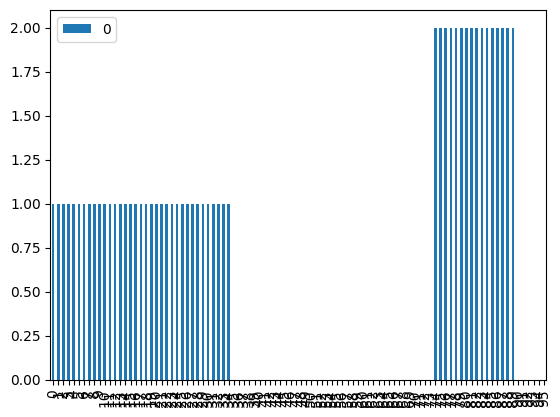

In [92]:
pd.DataFrame(load_model_fit_pred).plot(kind='bar')

In [78]:
jan_feb_P = df.copy()
load_model_fit_pred = TimeSeriesKMeans(n_clusters=3, max_iter=10,
                      metric="dtw", random_state=0).fit_predict(to_time_series_dataset(jan_feb_P))

In [82]:
#PLOT CENTERS 
load_model.cluster_centers_.shape

(3, 49, 1)

In [74]:
jan_feb_P = df.copy()
load_model = TimeSeriesKMeans(n_clusters=4, max_iter=10,
                      metric="dtw", random_state=0).fit(to_time_series_dataset(jan_feb_P))
jan_feb_P_df_cluster = pd.DataFrame(list(zip(jan_feb_P.columns, load_model.labels_)), columns=['metric', 'cluster'])
cluster_metrics_dict = jan_feb_P_df_cluster.groupby(['cluster'])['metric'].apply(lambda x: [x for x in x]).to_dict()
cluster_len_dict = jan_feb_P_df_cluster['cluster'].value_counts().to_dict()
clusters_dropped = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]==1]
clusters_final = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]>1]
clusters_final.sort()

for cluster_number in clusters_final:
    # get a rough quality score based on the correlation between metrics in the cluster
    x_corr = jan_feb_P[cluster_metrics_dict[cluster_number]].corr().abs().values
    x_corr_mean = round(x_corr[np.triu_indices(x_corr.shape[0],1)].mean(),2)
    # plot each cluster
    plot_title = f'cluster {cluster_number} (quality={x_corr_mean}, n={cluster_len_dict[cluster_number]})'
    plot_lines(jan_feb_P, cols=cluster_metrics_dict[cluster_number], renderer='vscode', theme=None, title=plot_title)

In [75]:
silhouette_score(jan_feb_P, load_model.labels_,metric="dtw")

0.461853384494287

In [76]:
jan_feb_P = df.copy()
load_model = TimeSeriesKMeans(n_clusters=10, max_iter=10,
                      metric="dtw", random_state=0).fit(to_time_series_dataset(jan_feb_P))
jan_feb_P_df_cluster = pd.DataFrame(list(zip(jan_feb_P.columns, load_model.labels_)), columns=['metric', 'cluster'])
cluster_metrics_dict = jan_feb_P_df_cluster.groupby(['cluster'])['metric'].apply(lambda x: [x for x in x]).to_dict()
cluster_len_dict = jan_feb_P_df_cluster['cluster'].value_counts().to_dict()
clusters_dropped = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]==1]
clusters_final = [cluster for cluster in cluster_len_dict if cluster_len_dict[cluster]>1]
clusters_final.sort()

for cluster_number in clusters_final:
    # get a rough quality score based on the correlation between metrics in the cluster
    x_corr = jan_feb_P[cluster_metrics_dict[cluster_number]].corr().abs().values
    x_corr_mean = round(x_corr[np.triu_indices(x_corr.shape[0],1)].mean(),2)
    # plot each cluster
    plot_title = f'cluster {cluster_number} (quality={x_corr_mean}, n={cluster_len_dict[cluster_number]})'
    plot_lines(jan_feb_P, cols=cluster_metrics_dict[cluster_number], renderer='vscode', theme=None, title=plot_title)

In [77]:
silhouette_score(jan_feb_P, load_model.labels_,metric="dtw")

0.41812472101021125